# Preprocessing

In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
from pathlib import Path
from datetime import datetime


In [3]:
cuestionario = pd.read_excel("EGD-Cuestionario.xlsx", engine='openpyxl')
cuestionario.columns = cuestionario.iloc[0]
cuestionario = cuestionario.iloc[1:]

# Plots

## Pregunta P2.GC.1

In [25]:
CantPersonas = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.GC.1"]]
bin = [0,50,100,150,200,300,500,800,1000,3000,10000,50000,57000]
numerico = pd.to_numeric(CantPersonas['P2.GC.1'], errors='coerce').notna()
CantPersonas = CantPersonas.loc[numerico]
CantPersonas['P2.GC.1'].dropna(inplace=True)
CantPersonas["P2.GC.1"] = CantPersonas["P2.GC.1"].astype(int)
bins = pd.cut(CantPersonas['P2.GC.1'], bins=bin, include_lowest=True)
CantPersonas['intervalos'] = bins

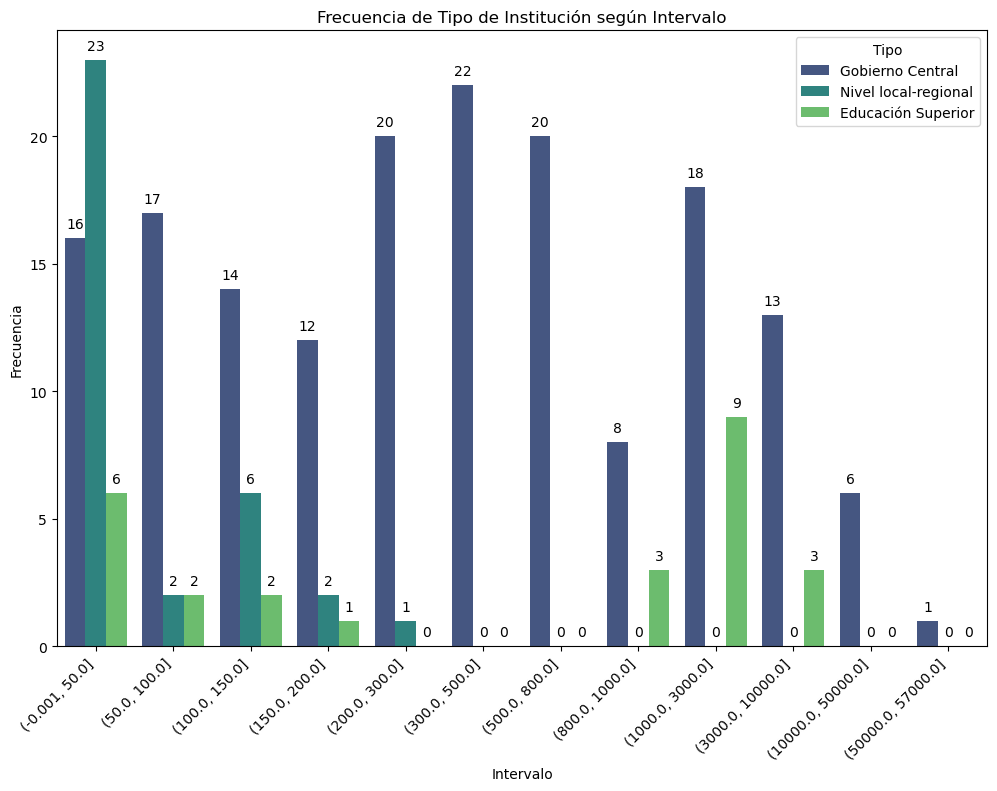

In [26]:
CantPersonas['intervalos'] = pd.Categorical(CantPersonas['intervalos'], ordered=True, categories=CantPersonas['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

## Pregunta P2.M.1

In [103]:
CantPersonasAdm = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.1"]]

CantPersonasCorp = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.2"]]

In [107]:
#Administracion municipal
binAdm = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 5000]
numerico = pd.to_numeric(CantPersonasAdm['P2.M.1.1'], errors='coerce').notna()
CantPersonasAdm = CantPersonasAdm.loc[numerico]
CantPersonasAdm['P2.M.1.1'].dropna(inplace=True)
CantPersonasAdm["P2.M.1.1"] = CantPersonasAdm["P2.M.1.1"].astype(int)
bins = pd.cut(CantPersonasAdm["P2.M.1.1"], bins=binAdm, include_lowest=True)
CantPersonasAdm['intervalos'] = bins

#Corp o fund municipales

binCorp = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 6000]
numerico = pd.to_numeric(CantPersonasCorp['P2.M.1.2'], errors='coerce').notna()
CantPersonasCorp = CantPersonasCorp.loc[numerico]
CantPersonasCorp['P2.M.1.2'].dropna(inplace=True)
CantPersonasCorp["P2.M.1.2"] = CantPersonasCorp["P2.M.1.2"].astype(int)
bins = pd.cut(CantPersonasCorp["P2.M.1.2"], bins=binCorp, include_lowest=True)
CantPersonasCorp['intervalos'] = bins

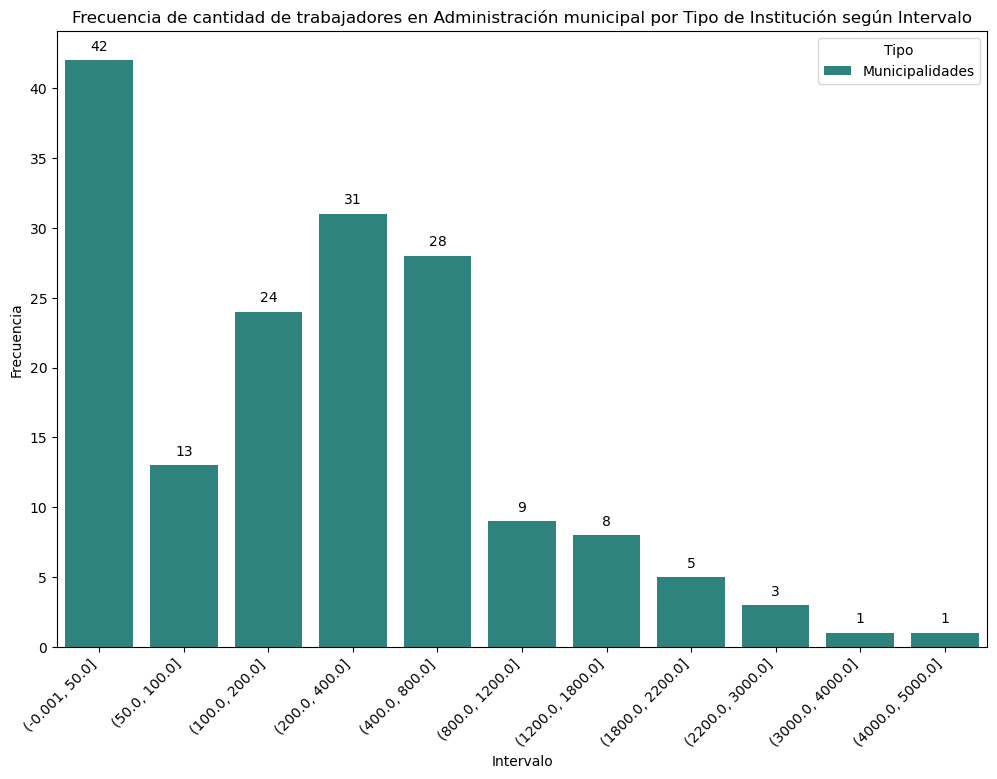

In [110]:
CantPersonasAdm['intervalos'] = pd.Categorical(CantPersonasAdm['intervalos'], ordered=True, categories=CantPersonasAdm['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasAdm, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Administración municipal por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

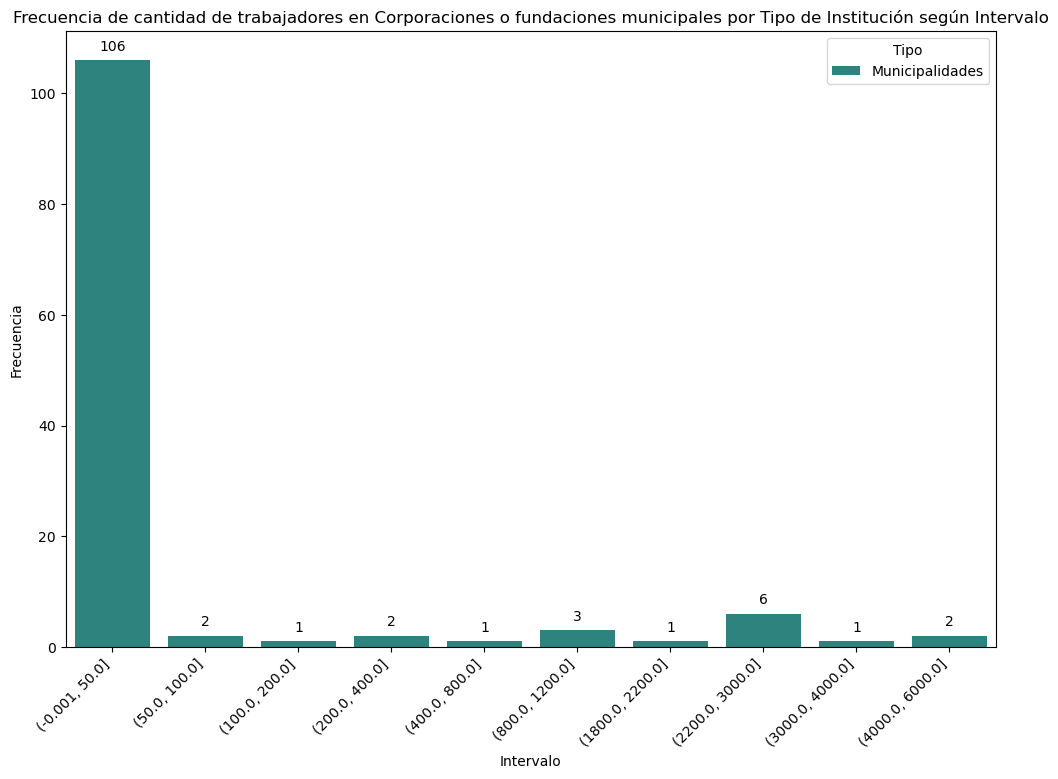

In [111]:
CantPersonasCorp['intervalos'] = pd.Categorical(CantPersonasCorp['intervalos'], ordered=True, categories=CantPersonasCorp['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasCorp, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Corporaciones o fundaciones municipales por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

## Pregunta P2.5

In [4]:
funciones = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.5.1","P2.5.2","P2.5.3","P2.5.4","P2.5.5","P2.5.6","P2.5.7","P2.5.8"]]

In [5]:
funciones

,Fecha de respuesta,Tipo,P1.1.1,P2.5.1,P2.5.2,P2.5.3,P2.5.4,P2.5.5,P2.5.6,P2.5.7,P2.5.8
1,2023-10-25 10:53:00,Municipalidades,Municipalidad de Pinto,Adquisiciones y gestión de contratos de tecnol...,Soporte y mesa de ayuda interna (ejemplo: equi...,Operación y mantención de software de gestión ...,Operación y mantención de software orientados ...,Desarrollo de software y mejoras perfectivas (...,Arquitectura y gestión de infraestructura (dat...,Sistemas de Seguridad de la Información/Cibers...,Otro (¿cuál?)
2,2023-10-25 13:18:00,Municipalidades,Municipalidad de Ránquil,Adquisiciones y gestión de contratos de tecnol...,Soporte y mesa de ayuda interna (ejemplo: equi...,Operación y mantención de software de gestión ...,Operación y mantención de software orientados ...,#n.s.,Arquitectura y gestión de infraestructura (dat...,Sistemas de Seguridad de la Información/Cibers...,#n.s.
3,2023-10-30 15:25:00,Municipalidades,Municipalidad de Cerrillos,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.
4,2023-10-30 17:17:00,Municipalidades,Municipalidad de Máfil,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.
5,2023-10-31 17:09:00,Municipalidades,Municipalidad de San Clemente,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.
...,...,...,...,...,...,...,...,...,...,...,...
423,2024-01-01 22:41:00,Municipalidades,Municipalidad de Coelemu,Adquisiciones y gestión de contratos de tecnol...,Soporte y mesa de ayuda interna (ejemplo: equi...,#n.s.,Operación y mantención de software orientados ...,#n.s.,Arquitectura y gestión de infraestructura (dat...,#n.s.,Otro (¿cuál?)
424,2024-01-02 06:49:00,Gobierno Central,Junta Nacional de Auxilio Escolar y Becas,Adquisiciones y gestión de contratos de tecnol...,Soporte y mesa de ayuda interna (ejemplo: equi...,Operación y mantención de software de gestión ...,Operación y mantención de software orientados ...,Desarrollo de software y mejoras perfectivas (...,Arquitectura y gestión de infraestructura (dat...,Sistemas de Seguridad de la Información/Cibers...,#n.s.
425,2024-01-02 09:51:00,Municipalidades,Municipalidad de Mulchén,Adquisiciones y gestión de contratos de tecnol...,Soporte y mesa de ayuda interna (ejemplo: equi...,Operación y mantención de software de gestión ...,Operación y mantención de software orientados ...,#n.s.,Arquitectura y gestión de infraestructura (dat...,Sistemas de Seguridad de la Información/Cibers...,#n.s.
426,2024-01-02 10:36:00,Municipalidades,Municipalidad de Peñalolén,Adquisiciones y gestión de contratos de tecnol...,Soporte y mesa de ayuda interna (ejemplo: equi...,Operación y mantención de software de gestión ...,Operación y mantención de software orientados ...,Desarrollo de software y mejoras perfectivas (...,Arquitectura y gestión de infraestructura (dat...,Sistemas de Seguridad de la Información/Cibers...,#n.s.


In [29]:
cuestionario.head(2)

,ID,Fecha de respuesta,Tipo,P1.1.1,P1.1.2,P1.1.3,P1.1.4,P2.GC.1,P2.M.1.1,P2.M.1.2,...,P13.M.2.16,P13.M.2.17,P13.M.2.18,P13.M.2.19,P13.M.3.1,P13.M.3.2,P13.M.3.3,P13.M.3.4,P13.M.3.5,P14.1
1,1,2023-10-25 10:53:00,Municipalidades,Municipalidad de Pinto,Patricio Alejandro Garrido Torres,informatica@munipinto.cl,'+56 9 8332 7173,#n.a.,120,0,...,6570499,22970062,0,0,100,0,0,0,100,#n.a.
2,2,2023-10-25 13:18:00,Municipalidades,Municipalidad de Ránquil,Francisco Javier Rondanelli Morales,informatica@mranquil.cl,'+56 9 5407 3649,#n.a.,1,0,...,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#s.i.,#n.a.
